In [ ]:
#installing dependencies
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chaitanyabvs","key":"f4145b5fd94e48c0767a83abd072d774"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

#changing permissin
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

100% 330M/330M [00:01<00:00, 186MB/s]
100% 330M/330M [00:02<00:00, 170MB/s]


In [ ]:
from zipfile import ZipFile
file_name = 'face-mask-12k-images-dataset.zip'

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('done')

done


# **Model Training**

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Lambda, Input
from keras.models import Sequential,Model
from keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
IMG_SIZE = 224

train_path = '/content/Face Mask Dataset/Train'
val_path = '/content/Face Mask Dataset/Validation'
test_path = '/content/Face Mask Dataset/Test'

In [ ]:
vgg = VGG16(input_shape = [IMG_SIZE,IMG_SIZE,3], weights = 'imagenet', include_top = False )

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
num_classes = 2

X = Flatten()(vgg.output)
prediction = Dense(2, activation = 'softmax')(X)

In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(1./255)
train_set = train_datagen.flow_from_directory(train_path, target_size = (IMG_SIZE, IMG_SIZE), batch_size = 32)
val_datagen = ImageDataGenerator(1./255)
val_set = val_datagen.flow_from_directory(val_path, target_size = (IMG_SIZE, IMG_SIZE), batch_size = 32)



Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0, save_best_only=True, mode='auto')
history = model.fit_generator(train_set, validation_data = test_set, epochs = 5,
                        steps_per_epoch = int(len(train_set)), validation_steps = int(len(test_set)), callbacks = [checkpoint])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
313/313 [==============================] - ETA: 0s - loss: 0.0961 - accuracy: 0.9982WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
313/313 [==============================] - 80s 255ms/step - loss: 0.0961 - accuracy: 0.9982 - val_loss: 0.5499 - val_accuracy: 0.9950
Epoch 2/5
313/313 [==============================] - 78s 248ms/step - loss: 0.0524 - accuracy: 0.9990 - val_loss: 0.8781 - val_accuracy: 0.9962
Epoch 3/5
313/313 [==============================] - 78s 248ms/step - loss: 0.0703 - accuracy: 0.9

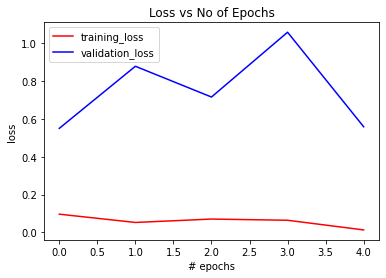

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',label='training_loss')
plt.plot(history.history['val_loss'],'b',label='validation_loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.title ('Loss vs No of Epochs')
plt.legend()
plt.show()

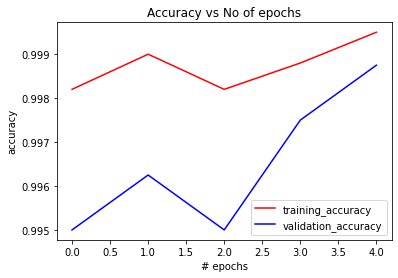

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training_accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation_accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs No of epochs')
plt.legend()
plt.show()

In [34]:
test_datagen = ImageDataGenerator(1./255)
test_set = test_datagen.flow_from_directory(test_path, target_size = (IMG_SIZE, IMG_SIZE), batch_size = 32)
predict = model.predict_generator(test_set)
print(model.evaluate_generator(test_set))

Found 992 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[0.6523571014404297, 0.9979838728904724]


In [ ]:
model.save('facefeatures.h5')